In [49]:
# Check if running in Google Colab
import sys
import os
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("Running in Google Colab. Installing the matrix_analysis package...")
    # Install the package directly from GitHub
    !pip install git+https://github.com/YOUR_USERNAME/matrix_analysis.git
    # Replace YOUR_USERNAME with your actual GitHub username
else:
    print("Running locally. Setting up paths...")
    # For local execution, we need to make sure the module is in the Python path
    
    # Method 1: Add the current directory to path (if matrix_analysis is in the same directory)
    current_dir = os.path.abspath(os.path.dirname('__file__'))
    if current_dir not in sys.path:
        sys.path.append(current_dir)
        print(f"Added current directory to path: {current_dir}")
    
    # Method 2: Check if we can find the matrix_analysis module
    module_dir = os.path.abspath(os.path.join(current_dir, 'matrix_analysis'))
    if os.path.exists(module_dir) and module_dir not in sys.path:
        sys.path.append(module_dir)
        print(f"Added module directory to path: {module_dir}")
    
    # Method 3: Go up one directory (fallback)
    from pathlib import Path
    parent_dir = str(Path.cwd().parent)
    if parent_dir not in sys.path:
        sys.path.append(parent_dir)
        print(f"Added parent directory to path: {parent_dir}")
    
    print("Path setup complete. Python will search these directories for modules.")

Running locally. Setting up paths...
Path setup complete. Python will search these directories for modules.


In [50]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Import functions from the matrix_analysis module
try:
    # This is how it would work after pip installing from GitHub
    from matrix_analysis.build_L_matrix import build_L_matrix
    from matrix_analysis.visualize_matrix import visualize_matrix
    from matrix_analysis.visualize_eigenvalues import visualize_eigenvalues
    from matrix_analysis.display_matrix_blocks import display_matrix_blocks
    from matrix_analysis.compute_matrix_rank import compute_matrix_rank
    from matrix_analysis.create_custom_colormap import create_custom_colormap
    from matrix_analysis.matrix_analysis_functions import save_characteristic_polynomial
    from matrix_analysis.save_matrix_to_file import save_matrix_to_file
except ImportError:
    # Fallback for local development with relative imports
    try:
        # For when running from the notebook's directory
        import sys
        import os
        # Add the parent directory to the path if running from notebook directory
        module_dir = os.path.abspath(os.path.join(os.path.dirname('__file__'), 'matrix_analysis'))
        if os.path.exists(module_dir) and module_dir not in sys.path:
            sys.path.append(module_dir)
            
        # Try importing directly from the module directory
        from build_L_matrix import build_L_matrix
        from visualize_matrix import visualize_matrix
        from visualize_eigenvalues import visualize_eigenvalues
        from display_matrix_blocks import display_matrix_blocks
        from compute_matrix_rank import compute_matrix_rank
        from create_custom_colormap import create_custom_colormap
        from matrix_analysis_functions import save_characteristic_polynomial
        from save_matrix_to_file import save_matrix_to_file
    except ImportError:
        # As a last resort, try importing with the package name
        try:
            from matrix_analysis.build_L_matrix import build_L_matrix
            from matrix_analysis.visualize_matrix import visualize_matrix
            from matrix_analysis.visualize_eigenvalues import visualize_eigenvalues
            from matrix_analysis.display_matrix_blocks import display_matrix_blocks
            from matrix_analysis.compute_matrix_rank import compute_matrix_rank
            from matrix_analysis.create_custom_colormap import create_custom_colormap
            from matrix_analysis.matrix_analysis_functions import save_characteristic_polynomial
            from matrix_analysis.save_matrix_to_file import save_matrix_to_file
        except ImportError:
            # Show a detailed error message
            print("ERROR: Could not import the required modules.")
            print("If running locally, please ensure that:")
            print("1. You've installed the package with 'pip install -e .'")
            print("2. Or the 'matrix_analysis' directory is in your Python path")
            print("\nFor detailed installation instructions, see the README.md file")

Matrix Analysis Toolkit v0.1.0
Use help(matrix_analysis) for more information on available functions.


## Input Parameters

Define the parameters for building the L matrix. You can adjust these values to experiment with different matrix configurations.

In [51]:
# Matrix parameters
n_1 = 1  # You can change these values
n1 = 2
n2 = 3
n3 = 4
n4 = 5

print(f"Matrix parameters: n_1={n_1}, n1={n1}, n2={n2}, n3={n3}, n4={n4}")

Matrix parameters: n_1=1, n1=2, n2=3, n3=4, n4=5


## Build L Matrix

Now we'll build the L matrix using the parameters defined above.

In [52]:
# Build the L matrix
L, block_coords = build_L_matrix(n_1, n1, n2, n3, n4)

print(f"Created L matrix with shape: {L.shape}")
print(f"Number of blocks: {len(block_coords)}")

Created L matrix with shape: (71, 154)
Number of blocks: 4


## Visualize the L Matrix

Let's create a visualization of the L matrix with the blocks highlighted.

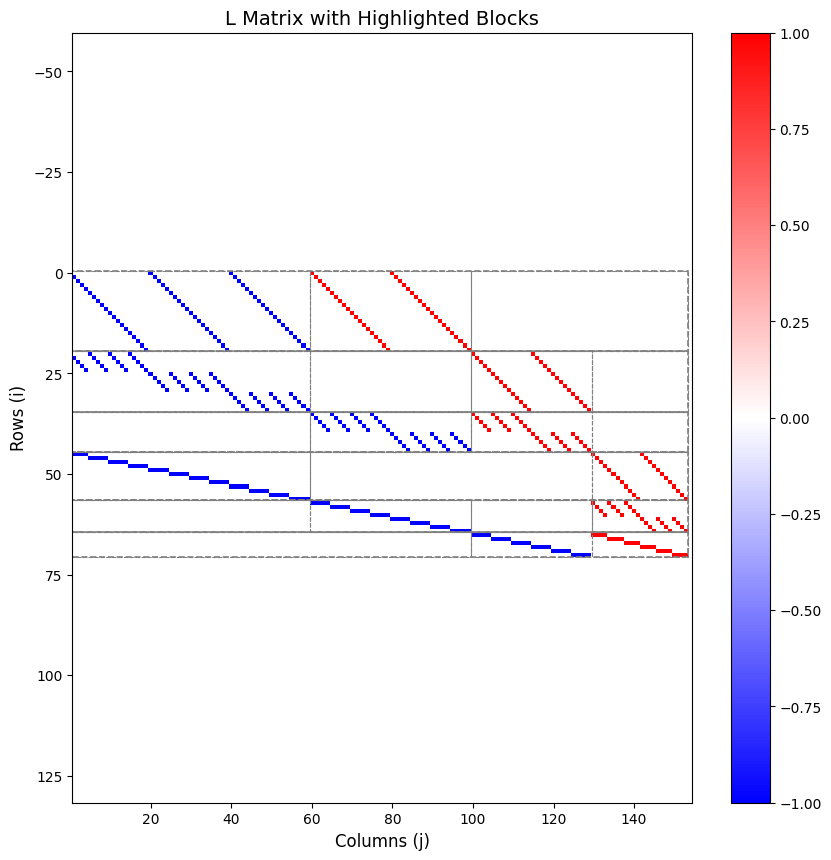

In [53]:
# Create figure for visualization
plt.figure(figsize=(10, 10))

# Apply our custom colormap
plt.imshow(L, cmap=create_custom_colormap())
plt.colorbar()
plt.clim(-1, 1)

# Configure the plot
plt.axis('equal')
plt.xlim(0.5, L.shape[1] + 0.5)
plt.ylim(0.5, L.shape[0] + 0.5)
plt.gca().invert_yaxis()  # Flip Y axis so rows go from top to bottom

# Add rectangular areas to highlight blocks
display_matrix_blocks(L, block_coords)

# Set titles and labels
plt.title('L Matrix with Highlighted Blocks', fontsize=14)
plt.xlabel('Columns (j)', fontsize=12)
plt.ylabel('Rows (i)', fontsize=12)
plt.grid(False)
plt.box(True)

# Display the plot
plt.show()

## Calculate L*L^T

Now we'll calculate L*L^T, which is an important step in analyzing the properties of L.

In [54]:
# Calculate L*L^T
Lt = L.T
L_LT = L @ Lt

print(f"Created L*L^T matrix with shape: {L_LT.shape}")

Created L*L^T matrix with shape: (71, 71)


## Visualize L*L^T

Let's visualize the L*L^T matrix.

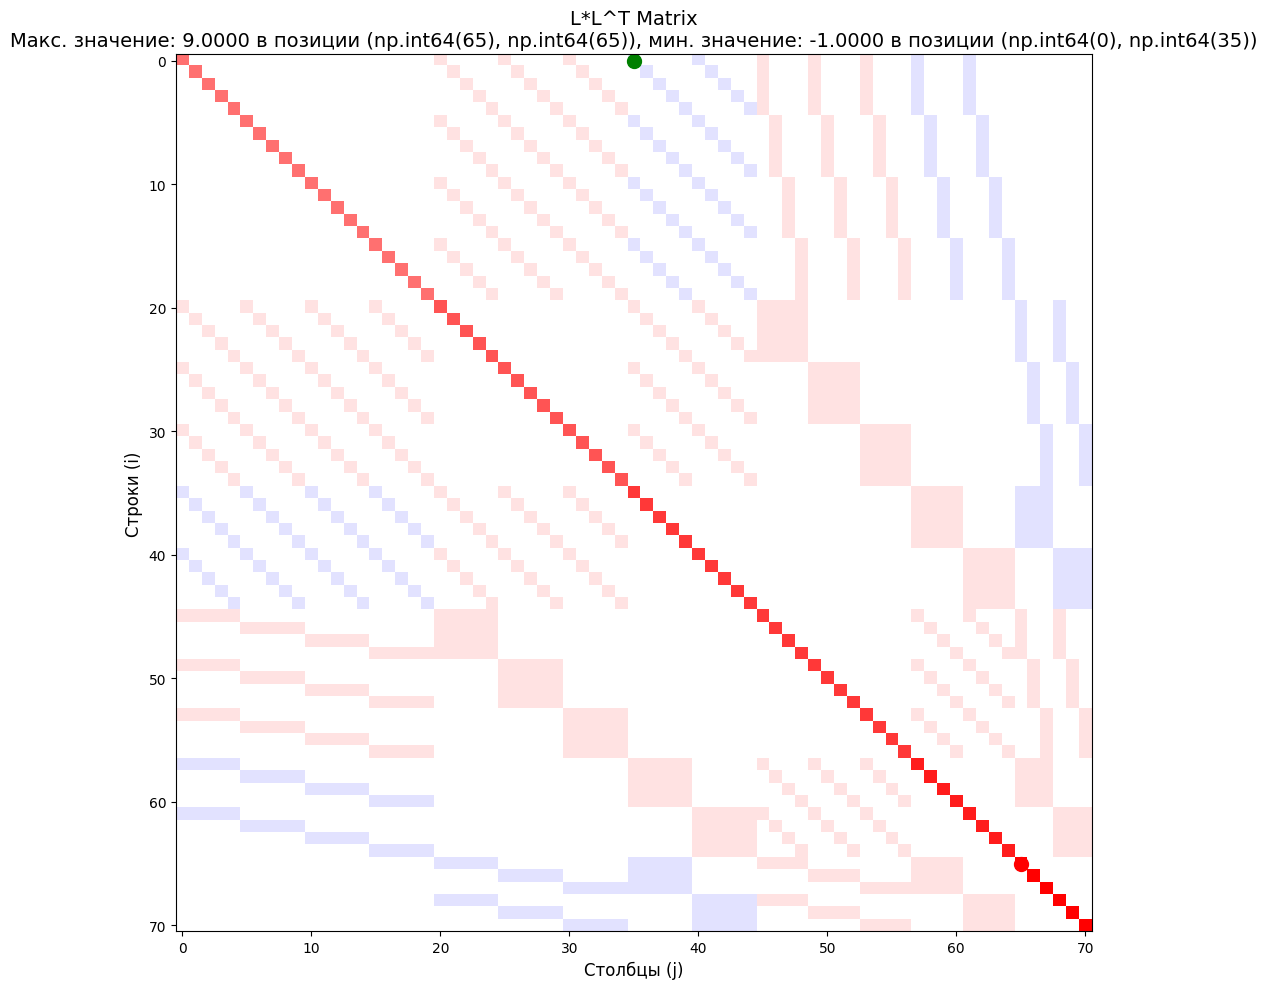

<Figure size 640x480 with 0 Axes>

In [55]:
# Visualize L*L^T matrix
fig, ax = plt.subplots(figsize=(10, 10))
im = visualize_matrix(L_LT, 'L*L^T Matrix', create_custom_colormap, None, True, ax=ax)
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

## Eigenvalue Analysis

Now we'll analyze the eigenvalues of the L*L^T matrix.

In [56]:
# Calculate eigenvalues and eigenvectors
eigenvalues_LLT, V_LLT = np.linalg.eig(L_LT)

# Sort eigenvalues in descending order
sorted_idx = np.argsort(eigenvalues_LLT)[::-1]
sorted_eigenvalues = eigenvalues_LLT[sorted_idx]
sorted_eigenvectors = V_LLT[:, sorted_idx]

# Display the top 10 eigenvalues
print("Top 10 eigenvalues of L*L^T:")
for i, val in enumerate(sorted_eigenvalues[:10]):
    print(f"  λ{i+1} = {val:.15g}")

Top 10 eigenvalues of L*L^T:
  λ1 = 14+0j
  λ2 = 14+0j
  λ3 = 14+0j
  λ4 = 12+0j
  λ5 = 12+0j
  λ6 = 11+0j
  λ7 = 11+0j
  λ8 = 11+0j
  λ9 = 11+0j
  λ10 = 10+0j


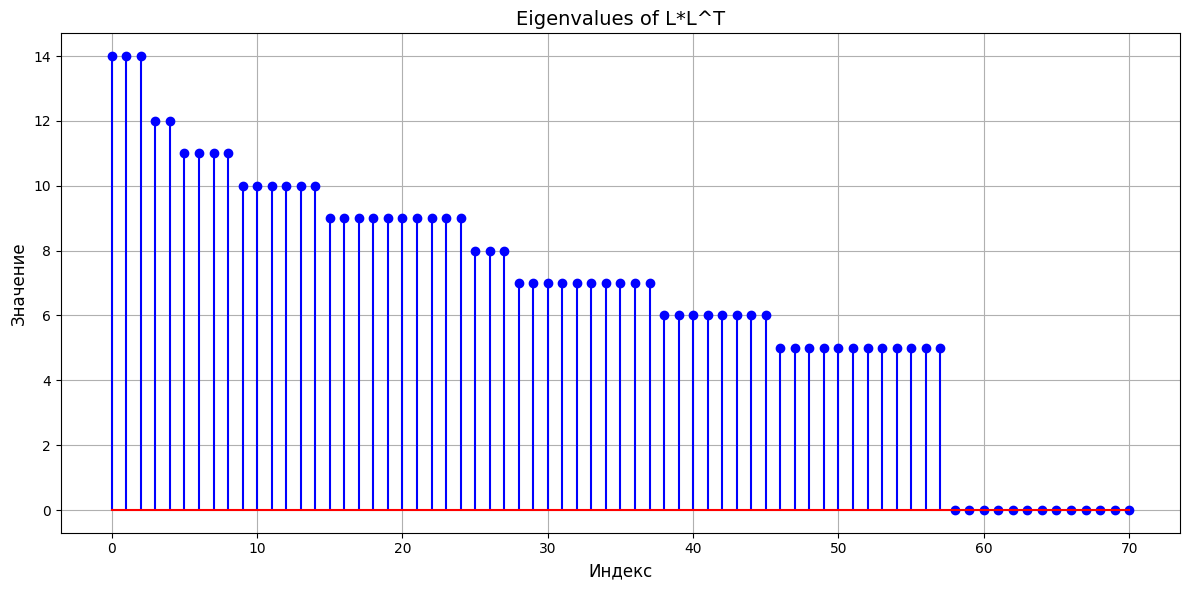

<Figure size 640x480 with 0 Axes>

In [57]:
# Visualize eigenvalues
fig, ax = plt.subplots(figsize=(12, 6))
line = visualize_eigenvalues(sorted_eigenvalues, 'Eigenvalues of L*L^T', None, ax=ax)
plt.tight_layout()
plt.show()

## Matrix Rank Analysis

Let's compute and analyze the rank of our matrices.

In [58]:
# Compute matrix ranks
matrix_rank_L = compute_matrix_rank(L)
matrix_rank_LLT = compute_matrix_rank(L_LT)

print(f"Rank of L matrix: {matrix_rank_L}")
print(f"Rank of L*L^T matrix: {matrix_rank_LLT}")
print(f"\nNote: For a matrix of shape {L.shape}, the maximum possible rank is {min(L.shape)}")

Rank of L matrix: 58
Rank of L*L^T matrix: 58

Note: For a matrix of shape (71, 154), the maximum possible rank is 71


## Characteristic Polynomial

Let's calculate the characteristic polynomial of the L*L^T matrix.

In [59]:
# Calculate characteristic polynomial coefficients using numpy's poly function
# This is more stable than direct calculation for large matrices
poly_coeffs = np.poly(eigenvalues_LLT)

# Print the first few coefficients
print("First 5 coefficients of the characteristic polynomial (highest degrees):")
for i, coef in enumerate(poly_coeffs[:5]):
    power = len(poly_coeffs) - i - 1
    print(f"a{power} = {coef:.6g}")

First 5 coefficients of the characteristic polynomial (highest degrees):
a71 = 1
a70 = -462
a69 = 104702
a68 = -1.55148e+07
a67 = 1.69056e+09


## Save Results to Files

In this section, we'll save our results to files. This is optional and depends on whether you want to generate output files in your current environment.

In [ ]:
input("Press Enter to continue...")
# Define a function to check if we can write to the current directory
def can_write_to_directory():
    try:
        test_file = 'test_write_permission.txt'
        with open(test_file, 'w') as f:
            f.write('test')
        os.remove(test_file)
        return True
    except:
        return False

# Check if we can write to the current directory
can_write = can_write_to_directory()

if can_write:
    print("We have write permission. Saving results to files...")
    
    # Save the L matrix to a text file
    L_txt_filename = 'matrix_L.txt'
    with open(L_txt_filename, 'w') as f:
        f.write(f'# L Matrix of shape {L.shape[0]}x{L.shape[1]}\n')
        for i in range(L.shape[0]):
            for j in range(L.shape[1]):
                f.write(f'{L[i,j]:8.4f} ')
            f.write('\n')
    print(f"L matrix saved to: {L_txt_filename}")
    
    # Save the L*L^T matrix to a text file
    L_LT_txt_filename = 'matrix_L_LT.txt'
    with open(L_LT_txt_filename, 'w') as f:
        f.write(f'# L*L^T Matrix of shape {L_LT.shape[0]}x{L_LT.shape[1]}\n')
        for i in range(L_LT.shape[0]):
            for j in range(L_LT.shape[1]):
                f.write(f'{L_LT[i,j]:12.6f} ')
            f.write('\n')
    print(f"L*L^T matrix saved to: {L_LT_txt_filename}")
    
    # Save eigenvalues to a text file
    eigen_filename = 'eigenvalues_L_LT.txt'
    with open(eigen_filename, 'w') as f:
        f.write('EIGENVALUE ANALYSIS OF L*L^T MATRIX\n')
        f.write('===========================================\n\n')
        f.write(f'Date: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}\n\n')
        f.write(f'MATRIX SIZE: {L_LT.shape[0]} x {L_LT.shape[1]}\n\n')
        f.write(f'MATRIX RANK: {matrix_rank_LLT}\n\n')
        f.write('EIGENVALUES (sorted in descending order):\n')
        f.write('========================================================\n\n')

        for i, val in enumerate(sorted_eigenvalues):
            f.write(f'  λ{i+1} = {val:.15g}\n')
    print(f"Eigenvalues saved to: {eigen_filename}")
    
    # Save matrix rank to a text file
    rank_filename = 'matrix_rank.txt'
    with open(rank_filename, 'w') as f:
        f.write('MATRIX RANK ANALYSIS\n')
        f.write('===========================================\n\n')
        f.write(f'Date: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}\n\n')
        f.write(f'L matrix size: {L.shape[0]} x {L.shape[1]}\n')
        f.write(f'L*L^T matrix size: {L_LT.shape[0]} x {L_LT.shape[1]}\n\n')
        f.write(f'Rank of L matrix: {matrix_rank_L}\n')
        f.write(f'Rank of L*L^T matrix: {matrix_rank_LLT}\n\n')
        f.write('Note: The rank of a matrix is the number of linearly independent rows or columns.\n')
        f.write('For a symmetric matrix like L*L^T, the rank equals the number of non-zero eigenvalues.\n')
    print(f"Matrix rank information saved to: {rank_filename}")
    
    # List of created files
    print("\nFiles created:")
    print(f"  - {L_txt_filename} - L matrix in text format")
    print(f"  - {L_LT_txt_filename} - L*L^T matrix in text format")
    print(f"  - {eigen_filename} - eigenvalues of L*L^T")
    print(f"  - {rank_filename} - matrix rank information")
else:
    print("We don't have write permission in this environment (common in Google Colab).")
    print("Results were not saved to files, but you can download the generated images manually.")

## Conclusion

In this notebook, we've demonstrated the key features of the `matrix_analysis` module:

1. Building a specialized L matrix
2. Visualizing the matrix structure with custom colormaps
3. Calculating and analyzing L*L^T
4. Computing eigenvalues and matrix rank
5. Saving results for further analysis

You can use this notebook as a starting point for your own matrix analysis, changing the input parameters or extending the functionality to suit your needs.

### Next Steps

Try modifying the input parameters to see how they affect the matrix properties and analysis results.

# Matrix Analysis Toolkit

This notebook serves as the main interface for the matrix analysis toolkit. It demonstrates the capabilities of the `matrix_analysis` module and provides a user-friendly interface for analyzing matrices.

## Features

* Building specialized matrices (L matrix)
* Visualizing matrices with custom colormaps
* Computing and visualizing eigenvalues
* Analyzing matrix rank
* Saving results to files

## Setup for Google Colab

This notebook can be run directly on Google Colab by installing the package from GitHub.

## Installation

First, let's check if we're running in Google Colab, and if so, install the package directly from GitHub.

## Helper Function

Let's create a helper function to ensure we can import the necessary modules regardless of the environment (local or Google Colab).

In [ ]:
# Helper function to find the matrix_analysis module
def find_module_path():
    """
    Find and add the matrix_analysis module path to sys.path
    Returns True if successful, False otherwise
    """
    import sys
    import os
    from pathlib import Path
    
    # Try different potential locations for the module
    potential_paths = [
        # Current directory
        os.path.abspath(os.path.dirname('__file__')),
        # 'matrix_analysis' subdirectory
        os.path.abspath(os.path.join(os.path.dirname('__file__'), 'matrix_analysis')),
        # Parent directory
        str(Path.cwd().parent),
        # Two directories up (sometimes needed)
        str(Path.cwd().parent.parent)
    ]
    
    # Check each path for the module files
    for path in potential_paths:
        module_check_file = os.path.join(path, 'matrix_analysis', 'build_L_matrix.py')
        direct_check_file = os.path.join(path, 'build_L_matrix.py')
        
        # Add path if it contains the module
        if os.path.exists(module_check_file) and path not in sys.path:
            print(f"Found matrix_analysis module at: {path}")
            sys.path.append(path)
            return True
        # For direct imports
        elif os.path.exists(direct_check_file) and path not in sys.path:
            print(f"Found individual modules at: {path}")
            sys.path.append(path)
            return True
    
    # If we couldn't find the module
    print("WARNING: Couldn't find the matrix_analysis module in the standard locations.")
    print("You may need to install the package or adjust the Python path.")
    return False

# If running locally, try to find the module
if not IN_COLAB:
    find_module_path()

You may need to install the package or adjust the Python path.


In [ ]:
# Reload modules for local development to pick up changes
import importlib
import sys

# Ensure IN_COLAB is defined (it should be from a previous cell)
try:
    _ = IN_COLAB
except NameError:
    IN_COLAB = 'google.colab' in sys.modules
    print("IN_COLAB was not defined, defined it now.")

if not IN_COLAB:
    print("Attempting to reload matrix_analysis modules for local development...")
    # List of modules associated with the matrix_analysis package
    modules_to_reload = [
        'matrix_analysis.create_custom_colormap',
        'matrix_analysis.visualize_matrix',
        'matrix_analysis.visualize_eigenvalues',
        'matrix_analysis.build_L_matrix',
        'matrix_analysis.display_matrix_blocks',
        'matrix_analysis.compute_matrix_rank',
        'matrix_analysis.matrix_analysis_functions',
        'matrix_analysis.save_matrix_to_file',
        'matrix_analysis.__init__', # Reload __init__
        'matrix_analysis' # Reload the parent package itself
    ]
    
    reloaded_something = False
    for module_name in modules_to_reload:
        if module_name in sys.modules:
            try:
                importlib.reload(sys.modules[module_name])
                print(f"Successfully reloaded {module_name}")
                reloaded_something = True
            except Exception as e:
                print(f"Error reloading {module_name}: {e}")
        # else:
        #    print(f"Module {module_name} not in sys.modules, skipping its reload.")
            
    if reloaded_something:
        print("Module reloading complete. Subsequent imports will use the new versions.")
    else:
        print("No relevant modules were found in sys.modules to reload. Ensure they are imported first if this is unexpected.")
        
else:
    print("Running in Colab, or matrix_analysis modules not yet imported, skipping explicit reload.")

Attempting to reload matrix_analysis modules for local development...
Successfully reloaded matrix_analysis.create_custom_colormap
Successfully reloaded matrix_analysis.visualize_matrix
Successfully reloaded matrix_analysis.visualize_eigenvalues
Successfully reloaded matrix_analysis.build_L_matrix
Successfully reloaded matrix_analysis.display_matrix_blocks
Successfully reloaded matrix_analysis.compute_matrix_rank
Successfully reloaded matrix_analysis.matrix_analysis_functions
Successfully reloaded matrix_analysis.save_matrix_to_file
Matrix Analysis Toolkit v0.1.0
Use help(matrix_analysis) for more information on available functions.
Successfully reloaded matrix_analysis
Module reloading complete. Subsequent imports will use the new versions.
